In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
wine = pd.read_csv("winequality-red.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Let's distribute to understand the table

<Axes: xlabel='quality', ylabel='fixed acidity'>

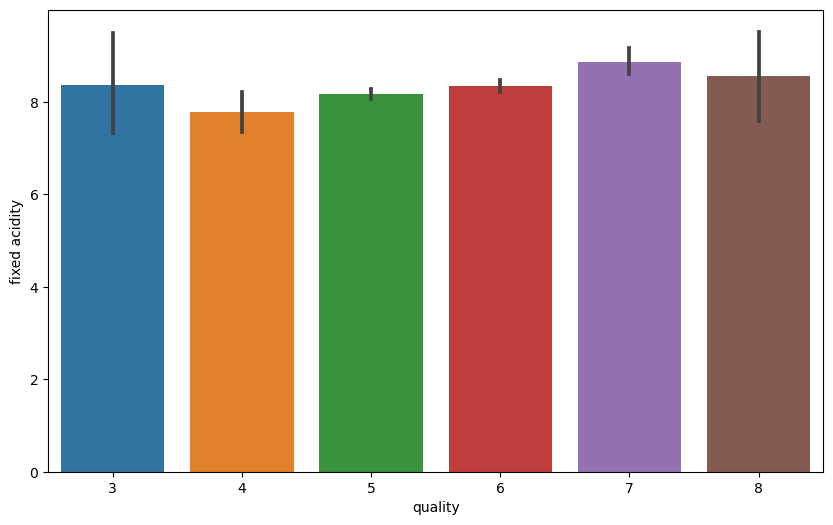

In [5]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='fixed acidity',data=wine)

Here we see that fixed acidity does not give any specification to classify the quality

<Axes: xlabel='quality', ylabel='volatile acidity'>

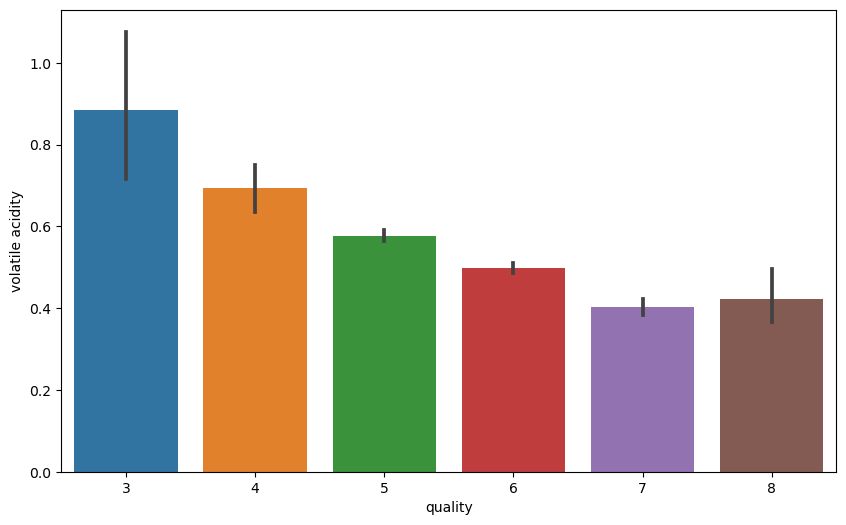

In [6]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x="quality",y='volatile acidity',data=wine)

Here we see that its quite a dowing trend in the volatile acidity as we go higher the quality

<Axes: xlabel='quality', ylabel='citric acid'>

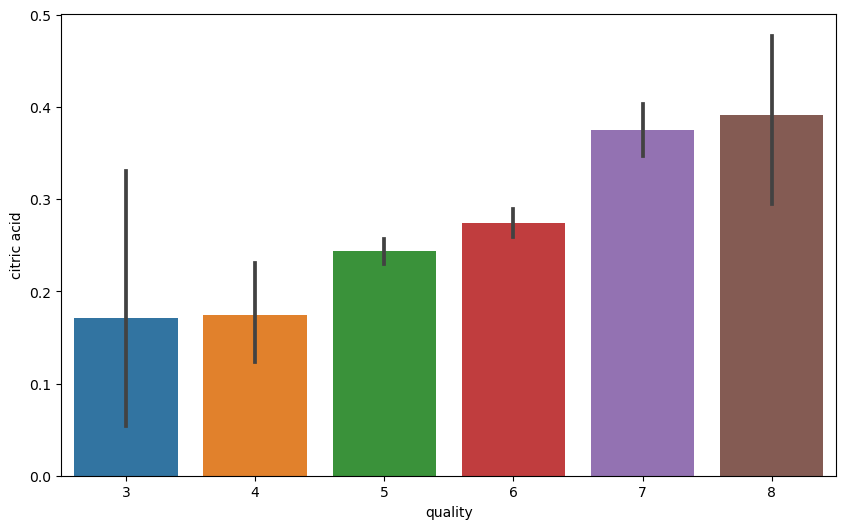

In [7]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='citric acid',data=wine)

Here, we can clearly see a increasing trend in order to increase quality

<Axes: xlabel='quality', ylabel='residual sugar'>

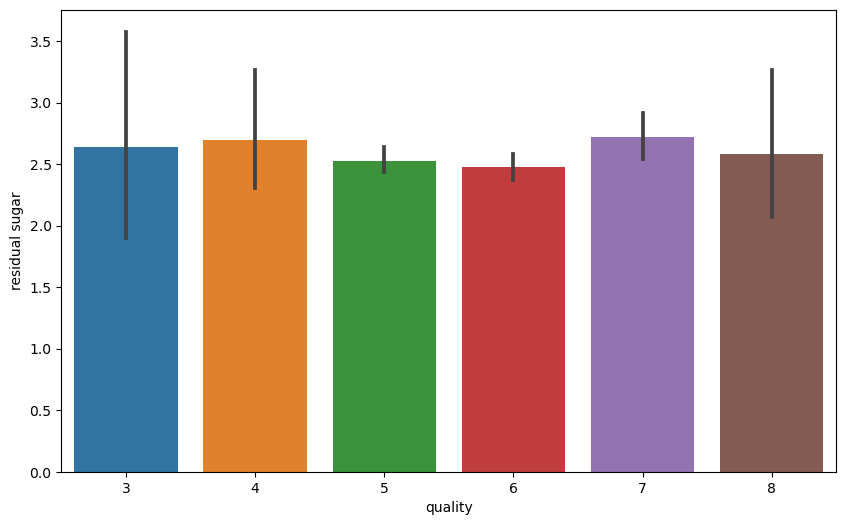

In [8]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='residual sugar',data=wine)

<Axes: xlabel='quality', ylabel='chlorides'>

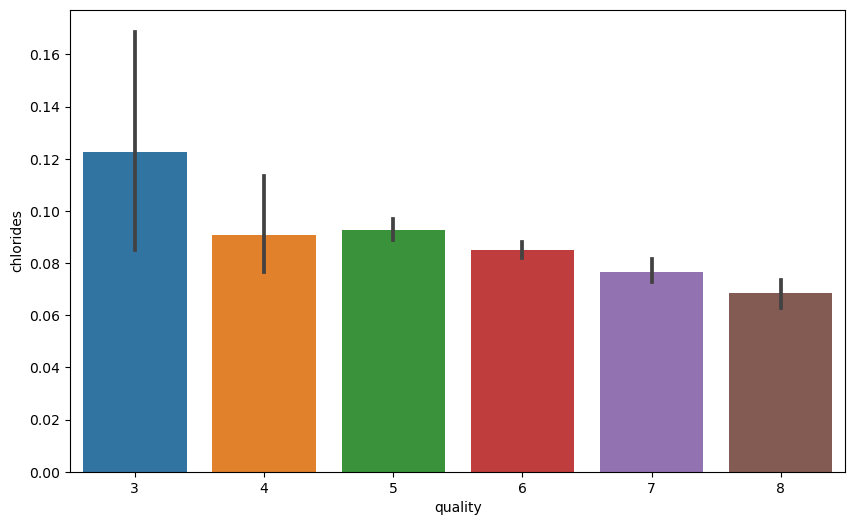

In [9]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='chlorides',data=wine)

Composition of chloride also go down as we go higher in the quality of the wine

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

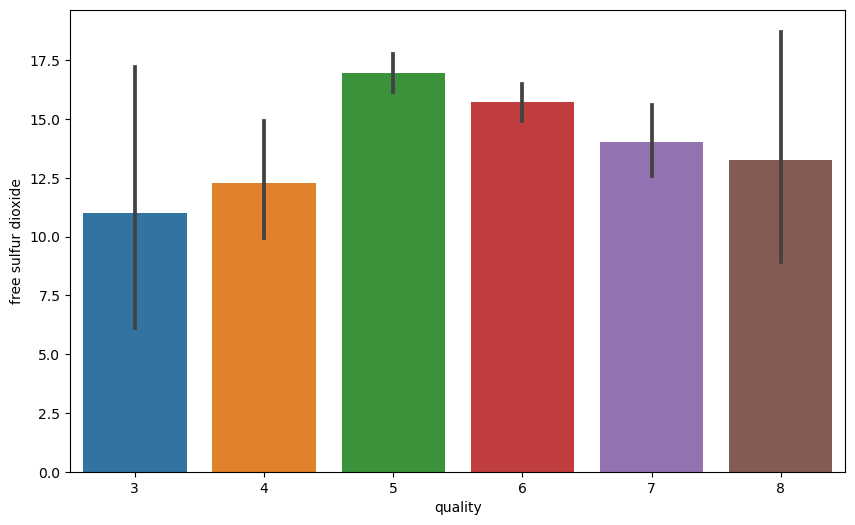

In [10]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

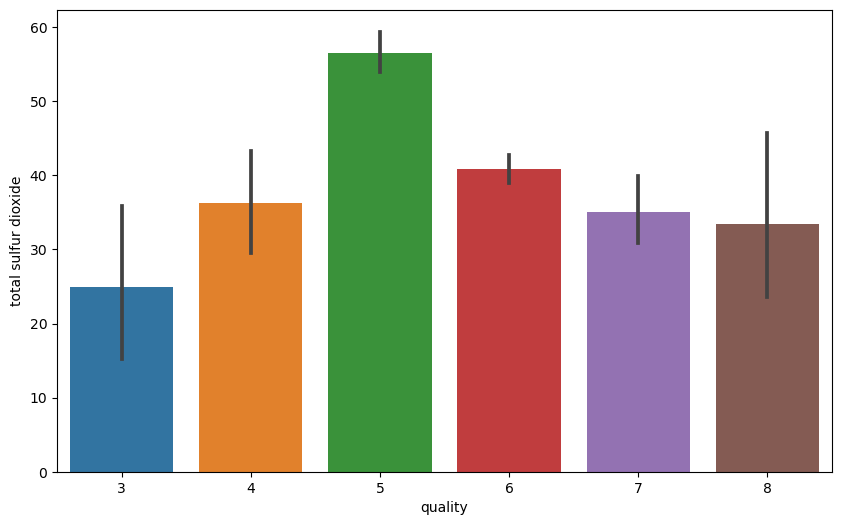

In [11]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)

<Axes: xlabel='quality', ylabel='sulphates'>

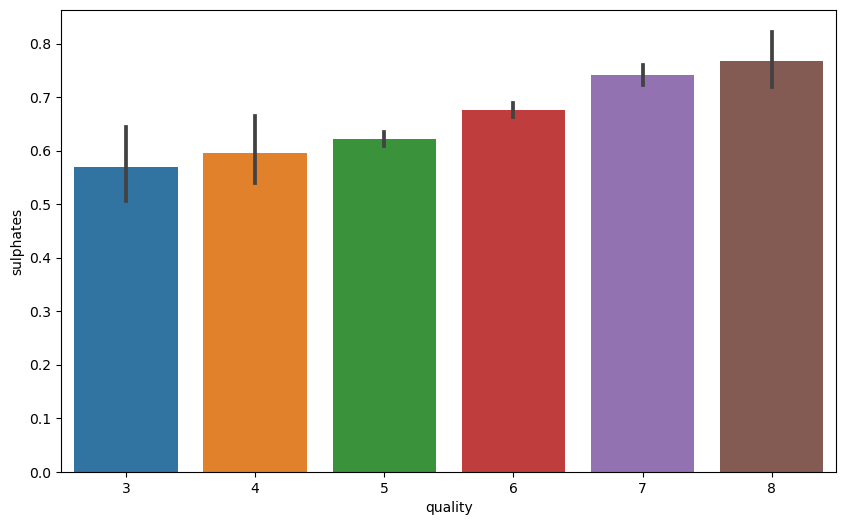

In [12]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='sulphates',data=wine)

<Axes: xlabel='quality', ylabel='alcohol'>

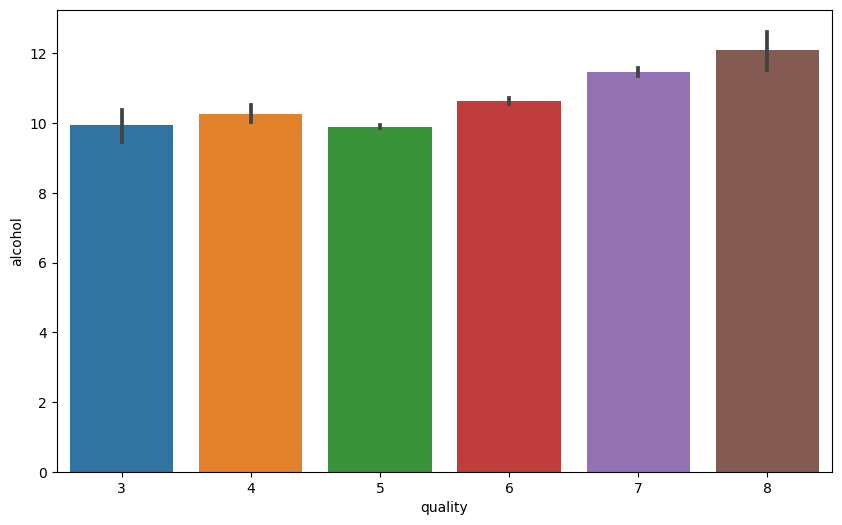

In [13]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='alcohol',data=wine)

# Preprocessing Data for performing Machine Learning algorithms

In [14]:
bins=(2,6.5,8)
group_names=['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins=bins,labels=group_names)

In [15]:
label_quality = LabelEncoder()

In [16]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [17]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [18]:
X = wine.drop('quality',axis=1)
y = wine['quality']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Our training and testing data is ready now to perform machine learning algorithm

Random Forest Classifier

In [24]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [25]:
print(classification_report(y_test,  pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.69      0.38      0.49        47

    accuracy                           0.88       320
   macro avg       0.80      0.68      0.71       320
weighted avg       0.87      0.88      0.87       320



Random forest gives 87% accuracy

In [26]:
print(confusion_matrix(y_test, pred_rfc))

[[265   8]
 [ 29  18]]


In [28]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [29]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       273
           1       0.50      0.45      0.47        47

    accuracy                           0.85       320
   macro avg       0.70      0.68      0.69       320
weighted avg       0.85      0.85      0.85       320



SGD gives 85% accuracy

In [30]:
print(confusion_matrix(y_test, pred_sgd))

[[252  21]
 [ 26  21]]


# Support Vector Classifier

In [31]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [32]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



SVC gives 86% accuracy